Analysis of IMDB Movie Database

1. KMeans Clustering

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("data/movie.csv")
data = data.dropna(subset=['duration', 'rating', 'year'])  # Drop rows with missing values

# Select features for clustering
features = ['duration', 'year', 'rating']
X = data[features]

# Scale features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Building the Model

In [25]:
# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

Visualize the Clusters in 2D

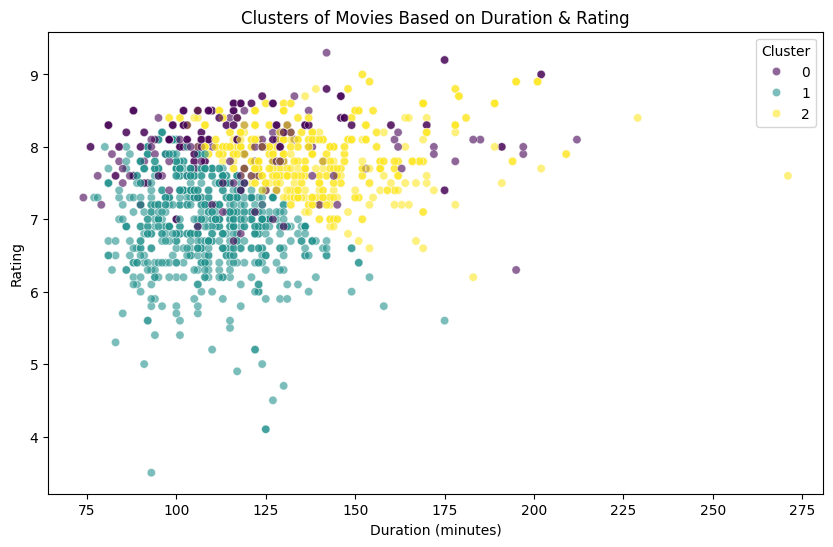

In [26]:
# Visualize clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['duration'], y=data['rating'], hue=data['Cluster'], palette='viridis', alpha=0.6)

plt.title('Clusters of Movies Based on Duration & Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.legend(title="Cluster")
plt.show()

Visualize the Clusters in 3D

In [27]:
# Visualize clusters in 3D
fig = px.scatter_3d(
    data, x='duration', y='rating', z='year', 
    color=data['Cluster'].astype(str),
    title="Interactive 3D Clusters (Duration, Rating, Year)",
    labels={'duration': 'Duration (minutes)', 'rating': 'Rating', 'year': 'Year'},
    opacity=0.2  # Adjust transparency here
)

fig.show()

Print Cluster Centroids Locations

In [28]:
print("Cluster Means:")
print(data.groupby("Cluster")[features].mean())

Cluster Means:
           duration         year    rating
Cluster                                   
0        120.183761  1982.363248  8.044017
1        108.496263  2007.967115  6.955007
2        139.325626  2008.053950  7.849904


Interpretation of the Three Clusters
- Cluster 0: Contains mostly older (pre-1980, average year: 1969), and high average rating: 8.0. This might represent classic, critically acclaimed films.
- Cluster 1: Focuses on modern films (post-2006) with relatively long durations (135 mins) and strong ratings (average rating: 7.9). Likely, these are newer, well-received blockbusters or popular movies.
- Cluster 2: Features shorter duration (< 108 mins), modern movies (post-2006), but with lower ratings (average rating: 6.9). These might be more mainstream or average-performing titles. 

Facet Plots

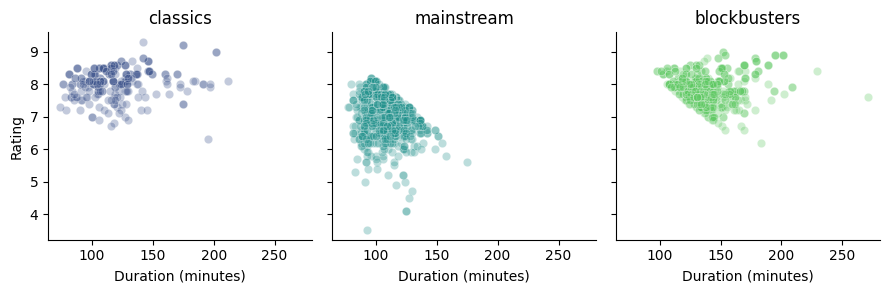

In [33]:
# Create facet plots
g = sns.FacetGrid(data, col="Cluster", hue="Cluster", palette="viridis", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="duration", y="rating", alpha=0.3)
g.set_titles("Cluster {col_name}")
g.set_axis_labels("Duration (minutes)", "Rating")

# Update column titles
custom_titles = {0: "classics", 1: "mainstream", 2: "blockbusters"}
for ax in g.axes.flat:
    title = ax.get_title().split()[-1]
    ax.set_title(custom_titles[int(title)])
plt.show()

Static Matplotlib 3D

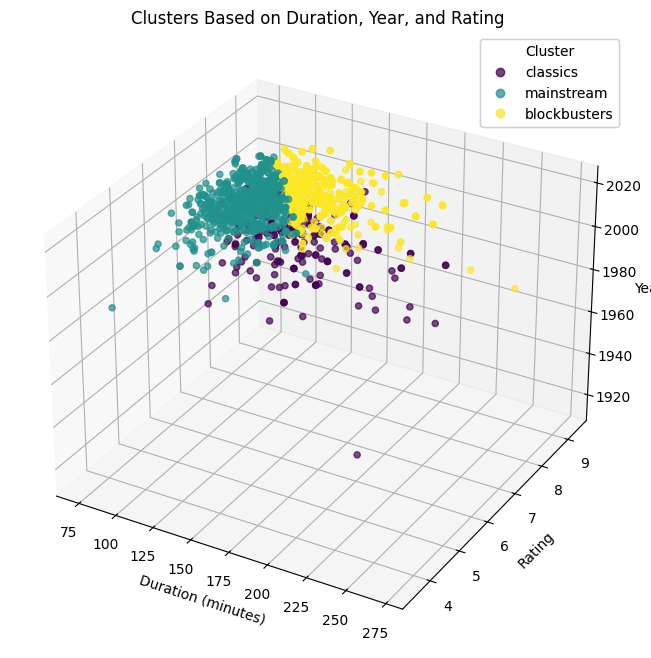

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# Create a static 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data["duration"], data["rating"], data["year"], c=data["Cluster"], cmap="viridis", alpha=0.7)

ax.set_title("Clusters Based on Duration, Year, and Rating")
ax.set_xlabel("Duration (minutes)")
ax.set_ylabel("Rating")
ax.set_zlabel("Year")

# Add legend
handles, _ = scatter.legend_elements()
legend = ax.legend(handles, ["classics", "mainstream", "blockbusters"], title="Cluster")
ax.add_artist(legend)

plt.show()

Heatmaps

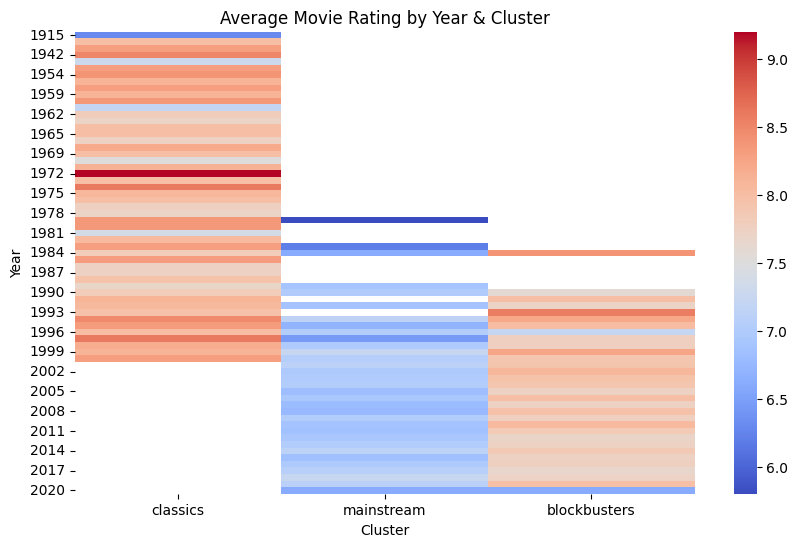

In [31]:
# Create pivot table for the heatmap
heatmap_data = data.pivot_table(values="rating", index="year", columns="Cluster", aggfunc="mean")

# Generate heatmap without annotations
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, cbar=True)

plt.title("Average Movie Rating by Year & Cluster")
plt.ylabel("Year")

# Update x-axis labels
ax.set_xticklabels(["classics", "mainstream", "blockbusters"], rotation=0)

plt.show()

Scoring the model

In [32]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.2893654014353293


A silhouette score of 0.29 is positive, indicating the model is working, but it is not a strong score - as indicated by the overlap between some of the clusters.